In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from sklearn.cluster import KMeans as scikit_KMeans
from sklearn.model_selection import train_test_split

In [3]:
wine = pd.read_csv("data/wine.data", header=None)

In [4]:
wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
colunas = ["Class","Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols", "Flavanoids", 
           "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue","OD280/OD315 of diluted wines",
           "Proline"]

In [6]:
wine.columns = colunas

In [7]:
wine.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [8]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [9]:
wine.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [10]:
wine[["Alcohol", "Malic acid"]].describe()

,Alcohol,Malic acid
count,178.000000,178.000000
mean,13.000618,2.336348
std,0.811827,1.117146
min,11.030000,0.740000
25%,12.362500,1.602500
50%,13.050000,1.865000
75%,13.677500,3.082500
max,14.830000,5.800000


Item 1 (Estatísticas Descritivas): Usando o conjunto de dados a você atribuído conforme a tabela
mostrada na próxima página, pede-se:

In [11]:
corr = wine.corr()
corr.style.background_gradient(cmap='coolwarm')

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
Class,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic acid,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity of ash,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid phenols,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


1.1 - Escolher dois atributos quaisquer e calcular suas estatísticas descritivas (global e por
classe), organizando-as conforme tabela abaixo.

In [12]:
def valores(coluna, classe):
    if(classe == 0):
        print (str(coluna)+" Global:   Média = "+str(round(wine[coluna].mean(), 2))
                   +", Desvio Padrão = "+str(round(wine[coluna].std(), 2))
                   +", Mediana = "+str(round(wine[coluna].median(), 2))
                   +", Minimo/Maximo = "+str(round(wine[coluna].min(), 2))+"/"+str(round(wine.Alcohol.max(), 2)))
    else:
        print (str(coluna)+" Classe "+str(classe)+": Média = "+str(round(wine[wine.Class==classe][coluna].mean(), 2))
                    +", Desvio Padrão = "+str(round(wine[wine.Class==classe][coluna].std(), 2))
                    +", Mediana = "+str(round(wine[wine.Class==classe][coluna].median(), 2))
                    +", Minimo/Maximo = "+str(round(wine[wine.Class==classe][coluna].min(), 2))
                                     +"/"+str(round(wine[wine.Class==classe][coluna].max(), 2)))

In [13]:
for i in range(0, 4):
    valores("Alcohol", i)

Alcohol Global:   Média = 13.0, Desvio Padrão = 0.81, Mediana = 13.05, Minimo/Maximo = 11.03/14.83
Alcohol Classe 1: Média = 13.74, Desvio Padrão = 0.46, Mediana = 13.75, Minimo/Maximo = 12.85/14.83
Alcohol Classe 2: Média = 12.28, Desvio Padrão = 0.54, Mediana = 12.29, Minimo/Maximo = 11.03/13.86
Alcohol Classe 3: Média = 13.15, Desvio Padrão = 0.53, Mediana = 13.16, Minimo/Maximo = 12.2/14.34


In [14]:
for i in range(0, 4):
    valores("Malic acid", i)

Malic acid Global:   Média = 2.34, Desvio Padrão = 1.12, Mediana = 1.87, Minimo/Maximo = 0.74/14.83
Malic acid Classe 1: Média = 2.01, Desvio Padrão = 0.69, Mediana = 1.77, Minimo/Maximo = 1.35/4.04
Malic acid Classe 2: Média = 1.93, Desvio Padrão = 1.02, Mediana = 1.61, Minimo/Maximo = 0.74/5.8
Malic acid Classe 3: Média = 3.33, Desvio Padrão = 1.09, Mediana = 3.26, Minimo/Maximo = 1.24/5.65


1.2 – Escolha uma das classes (de preferência a que possuir mais dados) e estime o (i) seu
centróide e (ii) sua matriz de covariância. Mostrar como foi realizado/feito/implementado
este subitem.

In [15]:
wine.Class.value_counts()

2    71
1    59
3    48
Name: Class, dtype: int64

In [16]:
dados = wine[["Alcohol", "Malic acid"]]

In [17]:
dados.head()

,Alcohol,Malic acid
0,14.23,1.71
1,13.20,1.78
2,13.16,2.36
3,14.37,1.95
4,13.24,2.59


Centroid

In [18]:
#Global
dataset = np.array(wine)
round(dataset[:,1].mean(), 2), round(dataset[:,2].mean(), 2)

(13.0, 2.34)

In [19]:
#Classe 2
dataset2 = np.array(wine[wine.Class==2])
round(dataset2[:,1].mean(), 2), round(dataset2[:,2].mean(), 2)

(12.28, 1.93)

Matriz de Covariancia

In [20]:
np.cov(dataset[:,1], dataset[:,2])

array([[0.65906233, 0.08561131],
       [0.08561131, 1.2480154 ]])

In [21]:
corr = dados.corr()
corr.style.background_gradient(cmap='coolwarm')

,Alcohol,Malic acid
Alcohol,1.000000,0.094397
Malic acid,0.094397,1.000000


1.3 – Para a classe do Subitem 1.2, fazer o gráfico de dispersão dos atributos escolhidos
para resolução do Subitem 1.1. Colocar nomes dos atributos nos eixos dos gráficos.

In [22]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

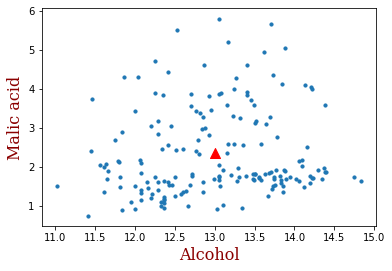

In [35]:
plt.scatter(dataset[:,1], dataset[:,2], s=10)
plt.scatter(dataset[:,1].mean(), dataset[:,2].mean(), marker='^', c='red', s=100)
plt.xlabel('Alcohol', fontdict=font)
plt.ylabel('Malic acid', fontdict=font)
plt.show()

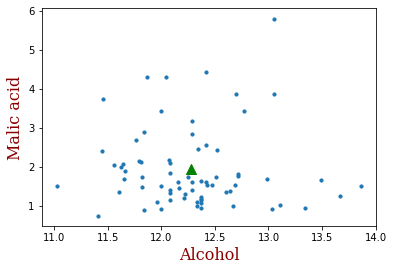

In [24]:
plt.scatter(dataset2[:,1], dataset2[:,2], s=10)
plt.scatter(dataset2[:,1].mean(), dataset2[:,2].mean(), marker='^', c='green', s=100)
plt.xlabel('Alcohol', fontdict=font)
plt.ylabel('Malic acid', fontdict=font)
plt.show()

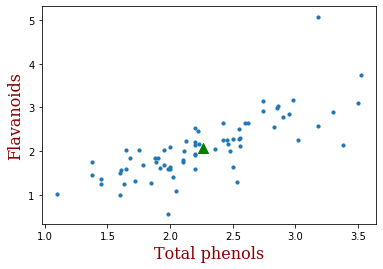

In [25]:
plt.scatter(dataset2[:,6], dataset2[:,7], s=10)
plt.scatter(dataset2[:,6].mean(), dataset2[:,7].mean(), marker='^', c='green', s=100)
plt.xlabel('Total phenols', fontdict=font)
plt.ylabel('Flavanoids', fontdict=font)
plt.show()

1.4 – O diagrama de dispersão do Subitem 1.3 indica a existência de algum tipo de
correlação entre os dois atributos escolhidos? Detalhe sua resposta.

Não. Para os atributos Alcohol e Malic acid a correlação entre eles é 0.094397, ou seja proxima de zero.
Já a correlação entre Total phenols e Flavanoids é 0.864564, muito próximo de 1.

1.5 - Estimar o coeficiente de correlação entre os dois atributos escolhidos para resolução
do Subitem 1.3 para a classe escolhida. Mostrar os cálculos e qual método/procedimento
foi utilizado para realizá-los.

1.6 – Determinar os parâmetros a (inclinação) e b (intercepto) da reta de tendência para os
gráfico de dispersão mostrado no Subitem 1.3. Mostrar os cálculos e qual
método/procedimento foi utilizado.

1.7 - Escolha um dos atributos usados na resolução do Subitem 1.1 e gere o histograma
correspondente para uma classe de sua escolha. A distribuição do atributo escolhido
assemelha-se a uma gaussiana? Há suspeita de presença de outliers nos dados? Detalhe sua
resposta.

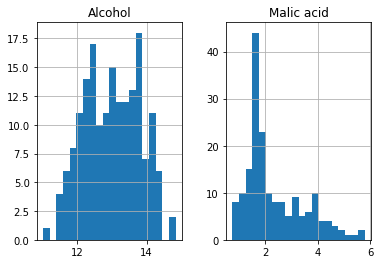

In [31]:
dados.hist(bins=20);

1.8 – Aplique o método de Box-Cox aos dados do Subitem 1.7 e, em seguida, aplique a
transformação z-score (normalização para média zero e variância unitária). Forneça o
histograma para o novo conjunto de medidas. A distribuição dos novos dados ficou mais
próxima de uma gaussiana? Detalhe sua resposta.

In [32]:
from scipy import stats
import seaborn as sns

In [33]:
test_data = stats.boxcox(dados['Alcohol'])

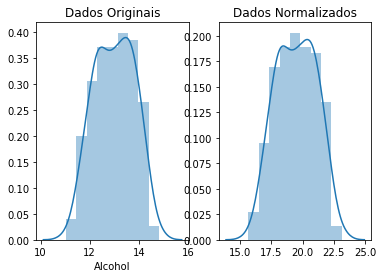

In [34]:
# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(dados['Alcohol'], ax=ax[0])
ax[0].set_title("Dados Originais");
sns.distplot(test_data[0], ax=ax[1])
ax[1].set_title("Dados Normalizados");